## Project - HEART ATTACK RISK ASSESSOR

## Import Dependencies

In [351]:
# pip install imblearn

In [352]:
# pip install catboost

In [353]:
# pip install xgboost

In [69]:
pip install shap

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for shap from https://files.pythonhosted.org/packages/05/c5/3c4fe600dd71fd2785d21f86a3e7f1f13de60c9b434052e05ba17598f81e/shap-0.46.0-cp312-cp312-macosx_10_9_x86_64.whl.metadata
  Obtaining dependency information for tqdm>=4.27.0 from https://files.pythonhosted.org/packages/18/eb/fdb7eb9e48b7b02554e1664afd3bd3f117f6b6d6c5881438a0b055554f9b/tqdm-4.66.4-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 2.4 MB/s eta 0:00:00
  Obtaining dependency information for slicer==0.0.8 from https://files.pythonhosted.org/packages/63/81/9ef641ff4e12cbcca30e54e72fb0951a2ba195d0cda0ba4100e532d929db/slicer-0.0.8-py3-none-any.whl.metadata
  Obtaining dependency information for numba from https://files.pythonhosted.org/packages/eb/5c/b5ec752c475e78a6c3676b67c514220dbde2725896bbb0b6ec6ea54b2738/numba-0.60.0-cp312-cp312-macosx_10_9_x86_64.whl.metadata
  Obtainin

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

import warnings
warnings.filterwarnings('ignore')

## Dataset Information
* Framingham Heart Study : https://www.kaggle.com/datasets/shreyjain601/framingham-heart-study
* Start Year: 1948
* Initial Enrollment: 5,209 subjects
* Initial Features: Blood pressure, blood chemistry, lung function, smoking history, health behaviors, ECG tracings, Echocardiography, medication use.
* Subset details: Includes laboratory, clinic, questionnaire, and adjudicated event data on 4,434 participants.
* Data Collection Period: Three examination periods, approximately 6 years apart, from 1956 to 1968.
* Follow-Up Duration: 24 years for outcomes.
* Data for analysis: data collected during the first follow-up period on 4,434 participants

## Load dataset

In [16]:
# Set working directory
import os
os.chdir('/Users/Grace/Dropbox/Job hunting/Techlent/Week16 Homework')

In [17]:
df = pd.read_csv('./Framingham Dataset.csv')

## EDA and Preprocessing

In [23]:
df.shape

(11627, 39)

In [24]:
df.head()

,RANDID,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,...,CVD,HYPERTEN,TIMEAP,TIMEMI,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP
0,2448,1,195.0,39,106.0,70.0,0,0.0,26.97,0,...,1,0,8766,6438,6438,6438,8766,6438,8766,8766
1,2448,1,209.0,52,121.0,66.0,0,0.0,NaN,0,...,1,0,8766,6438,6438,6438,8766,6438,8766,8766
2,6238,2,250.0,46,121.0,81.0,0,0.0,28.73,0,...,0,0,8766,8766,8766,8766,8766,8766,8766,8766
3,6238,2,260.0,52,105.0,69.5,0,0.0,29.43,0,...,0,0,8766,8766,8766,8766,8766,8766,8766,8766
4,6238,2,237.0,58,108.0,66.0,0,0.0,28.50,0,...,0,0,8766,8766,8766,8766,8766,8766,8766,8766


In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RANDID,11627.0,5.004741e+06,2.900877e+06,2448.00,2474378.000,5006008.00,7472730.00,9999312.0
SEX,11627.0,1.568074e+00,4.953655e-01,1.00,1.000,2.00,2.00,2.0
TOTCHOL,11218.0,2.411624e+02,4.536803e+01,107.00,210.000,238.00,268.00,696.0
AGE,11627.0,5.479281e+01,9.564299e+00,32.00,48.000,54.00,62.00,81.0
SYSBP,11627.0,1.363241e+02,2.279862e+01,83.50,120.000,132.00,149.00,295.0
DIABP,11627.0,8.303776e+01,1.166014e+01,30.00,75.000,82.00,90.00,150.0
CURSMOKE,11627.0,4.325277e-01,4.954479e-01,0.00,0.000,0.00,1.00,1.0
CIGPDAY,11548.0,8.250346e+00,1.218689e+01,0.00,0.000,0.00,20.00,90.0
BMI,11575.0,2.587735e+01,4.102640e+00,14.43,23.095,25.48,28.07,56.8
DIABETES,11627.0,4.558356e-02,2.085892e-01,0.00,0.000,0.00,0.00,1.0


In [26]:
# Information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11627 entries, 0 to 11626
Data columns (total 39 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RANDID    11627 non-null  int64  
 1   SEX       11627 non-null  int64  
 2   TOTCHOL   11218 non-null  float64
 3   AGE       11627 non-null  int64  
 4   SYSBP     11627 non-null  float64
 5   DIABP     11627 non-null  float64
 6   CURSMOKE  11627 non-null  int64  
 7   CIGPDAY   11548 non-null  float64
 8   BMI       11575 non-null  float64
 9   DIABETES  11627 non-null  int64  
 10  BPMEDS    11034 non-null  float64
 11  HEARTRTE  11621 non-null  float64
 12  GLUCOSE   10187 non-null  float64
 13  educ      11332 non-null  float64
 14  PREVCHD   11627 non-null  int64  
 15  PREVAP    11627 non-null  int64  
 16  PREVMI    11627 non-null  int64  
 17  PREVSTRK  11627 non-null  int64  
 18  PREVHYP   11627 non-null  int64  
 19  TIME      11627 non-null  int64  
 20  PERIOD    11627 non-null  in

In [28]:
# Extract data recorded during the first follow-up period
df1 = df.loc[df["PERIOD"] == 1]

### Useful features for our project
* **16 Numerical Features**: AGE, TOTCHOL, SYSBP, DIABP, CIGPDAY, BMI, BPMEDS, HEARTRTE, GLUCOSE, TIMEAP, TIMEMI, TIMEMIFC, TIMECHD, TIMESTRK, TIMECVD, TIMEHYP
* **10 Categorical Features**: SEX, CURSMOKE, DIABETES, BPMEDS, educ, PREVCHD, PREVAP, PREVMI, PREVSTRK, PREVHYP
* **Target variables**: TenYearHDR (defined from ANGINA, HOSPMI, MI_FCHD, ANYCHD, STROKE, CVD, HYPERTEN and PERIOD variables)


In [29]:
# Define the target variable: 10-year risk of experiencing heart disease
sumup = df1[["ANGINA", "HOSPMI", "MI_FCHD", "ANYCHD", "STROKE", "CVD"]].sum(axis = 1)

# Create a new column 'TenYearHDR' based on the condition
df1["TenYearHDR"] = sumup.apply(lambda x: 1 if x > 0 else 0)


In [30]:
df1.head(n=20)

,RANDID,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,...,HYPERTEN,TIMEAP,TIMEMI,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP,TenYearHDR
0,2448,1,195.0,39,106.0,70.0,0,0.0,26.97,0,...,0,8766,6438,6438,6438,8766,6438,8766,8766,1
2,6238,2,250.0,46,121.0,81.0,0,0.0,28.73,0,...,0,8766,8766,8766,8766,8766,8766,8766,8766,0
5,9428,1,245.0,48,127.5,80.0,1,20.0,25.34,0,...,0,8766,8766,8766,8766,8766,8766,8766,8766,0
7,10552,2,225.0,61,150.0,95.0,1,30.0,28.58,0,...,1,2956,2956,2956,2956,2089,2089,2956,0,1
9,11252,2,285.0,46,130.0,84.0,1,23.0,23.10,0,...,1,8766,8766,8766,8766,8766,8766,8766,4285,0
12,11263,2,228.0,43,180.0,110.0,0,0.0,30.30,0,...,1,8766,8766,5719,5719,8766,5719,8766,0,1
15,12629,2,205.0,63,138.0,71.0,0,0.0,33.11,0,...,1,373,8766,8766,373,8766,8766,8766,2212,1
17,12806,2,313.0,45,100.0,71.0,1,20.0,21.68,0,...,1,8766,8766,8766,8766,8766,8766,8766,8679,0
20,14367,1,260.0,52,141.5,89.0,0,0.0,26.36,0,...,1,8766,8766,8766,8766,8766,8766,8766,0,0
23,16365,1,225.0,43,162.0,107.0,1,30.0,23.61,0,...,1,8766,8766,8766,8766,8766,8766,8766,0,0


In [31]:
df1.isnull().sum()

RANDID           0
SEX              0
TOTCHOL         52
AGE              0
SYSBP            0
DIABP            0
CURSMOKE         0
CIGPDAY         32
BMI             19
DIABETES         0
BPMEDS          61
HEARTRTE         1
GLUCOSE        397
educ           113
PREVCHD          0
PREVAP           0
PREVMI           0
PREVSTRK         0
PREVHYP          0
TIME             0
PERIOD           0
HDLC          4434
LDLC          4434
DEATH            0
ANGINA           0
HOSPMI           0
MI_FCHD          0
ANYCHD           0
STROKE           0
CVD              0
HYPERTEN         0
TIMEAP           0
TIMEMI           0
TIMEMIFC         0
TIMECHD          0
TIMESTRK         0
TIMECVD          0
TIMEDTH          0
TIMEHYP          0
TenYearHDR       0
dtype: int64

In [32]:
# Drop unnecessary variables
vars_to_drop = ["HDLC", "LDLC", "DEATH", "PERIOD", "ANGINA", "HOSPMI", "MI_FCHD", "ANYCHD", "STROKE", "CVD", "HYPERTEN", "TIME", "TIMEDTH",
                'TIMEAP', 'TIMEMI', 'TIMEMIFC', 'TIMECHD', 'TIMESTRK', 'TIMECVD', 'TIMEHYP']
cleaned_df1 = df1.drop(columns=vars_to_drop)

In [33]:
cleaned_df1.describe().T

,count,mean,std,min,25%,50%,75%,max
RANDID,4434.0,4.987278e+06,2.903549e+06,2448.00,2440335.75,4972848.00,7463577.00,9999312.0
SEX,4434.0,1.561570e+00,4.962507e-01,1.00,1.00,2.00,2.00,2.0
TOTCHOL,4382.0,2.369843e+02,4.465110e+01,107.00,206.00,234.00,264.00,696.0
AGE,4434.0,4.992580e+01,8.676929e+00,32.00,42.00,49.00,57.00,70.0
SYSBP,4434.0,1.329078e+02,2.242160e+01,83.50,117.50,129.00,144.00,295.0
DIABP,4434.0,8.308356e+01,1.205600e+01,48.00,75.00,82.00,90.00,142.5
CURSMOKE,4434.0,4.918809e-01,4.999905e-01,0.00,0.00,0.00,1.00,1.0
CIGPDAY,4402.0,8.966379e+00,1.193171e+01,0.00,0.00,0.00,20.00,70.0
BMI,4415.0,2.584616e+01,4.101821e+00,15.54,23.09,25.45,28.09,56.8
DIABETES,4434.0,2.728913e-02,1.629430e-01,0.00,0.00,0.00,0.00,1.0


In [34]:
cleaned_df1["TenYearHDR"].sum()

1476

## Data Visualisation

In [35]:
var_cat = ['SEX','CURSMOKE','DIABETES','BPMEDS','educ','PREVCHD','PREVAP',
           'PREVMI','PREVSTRK','PREVHYP', 'TenYearHDR']
var_num = cleaned_df1.drop(columns=var_cat).columns[1:]

In [36]:
var_num

Index(['TOTCHOL', 'AGE', 'SYSBP', 'DIABP', 'CIGPDAY', 'BMI', 'HEARTRTE',
       'GLUCOSE'],
      dtype='object')

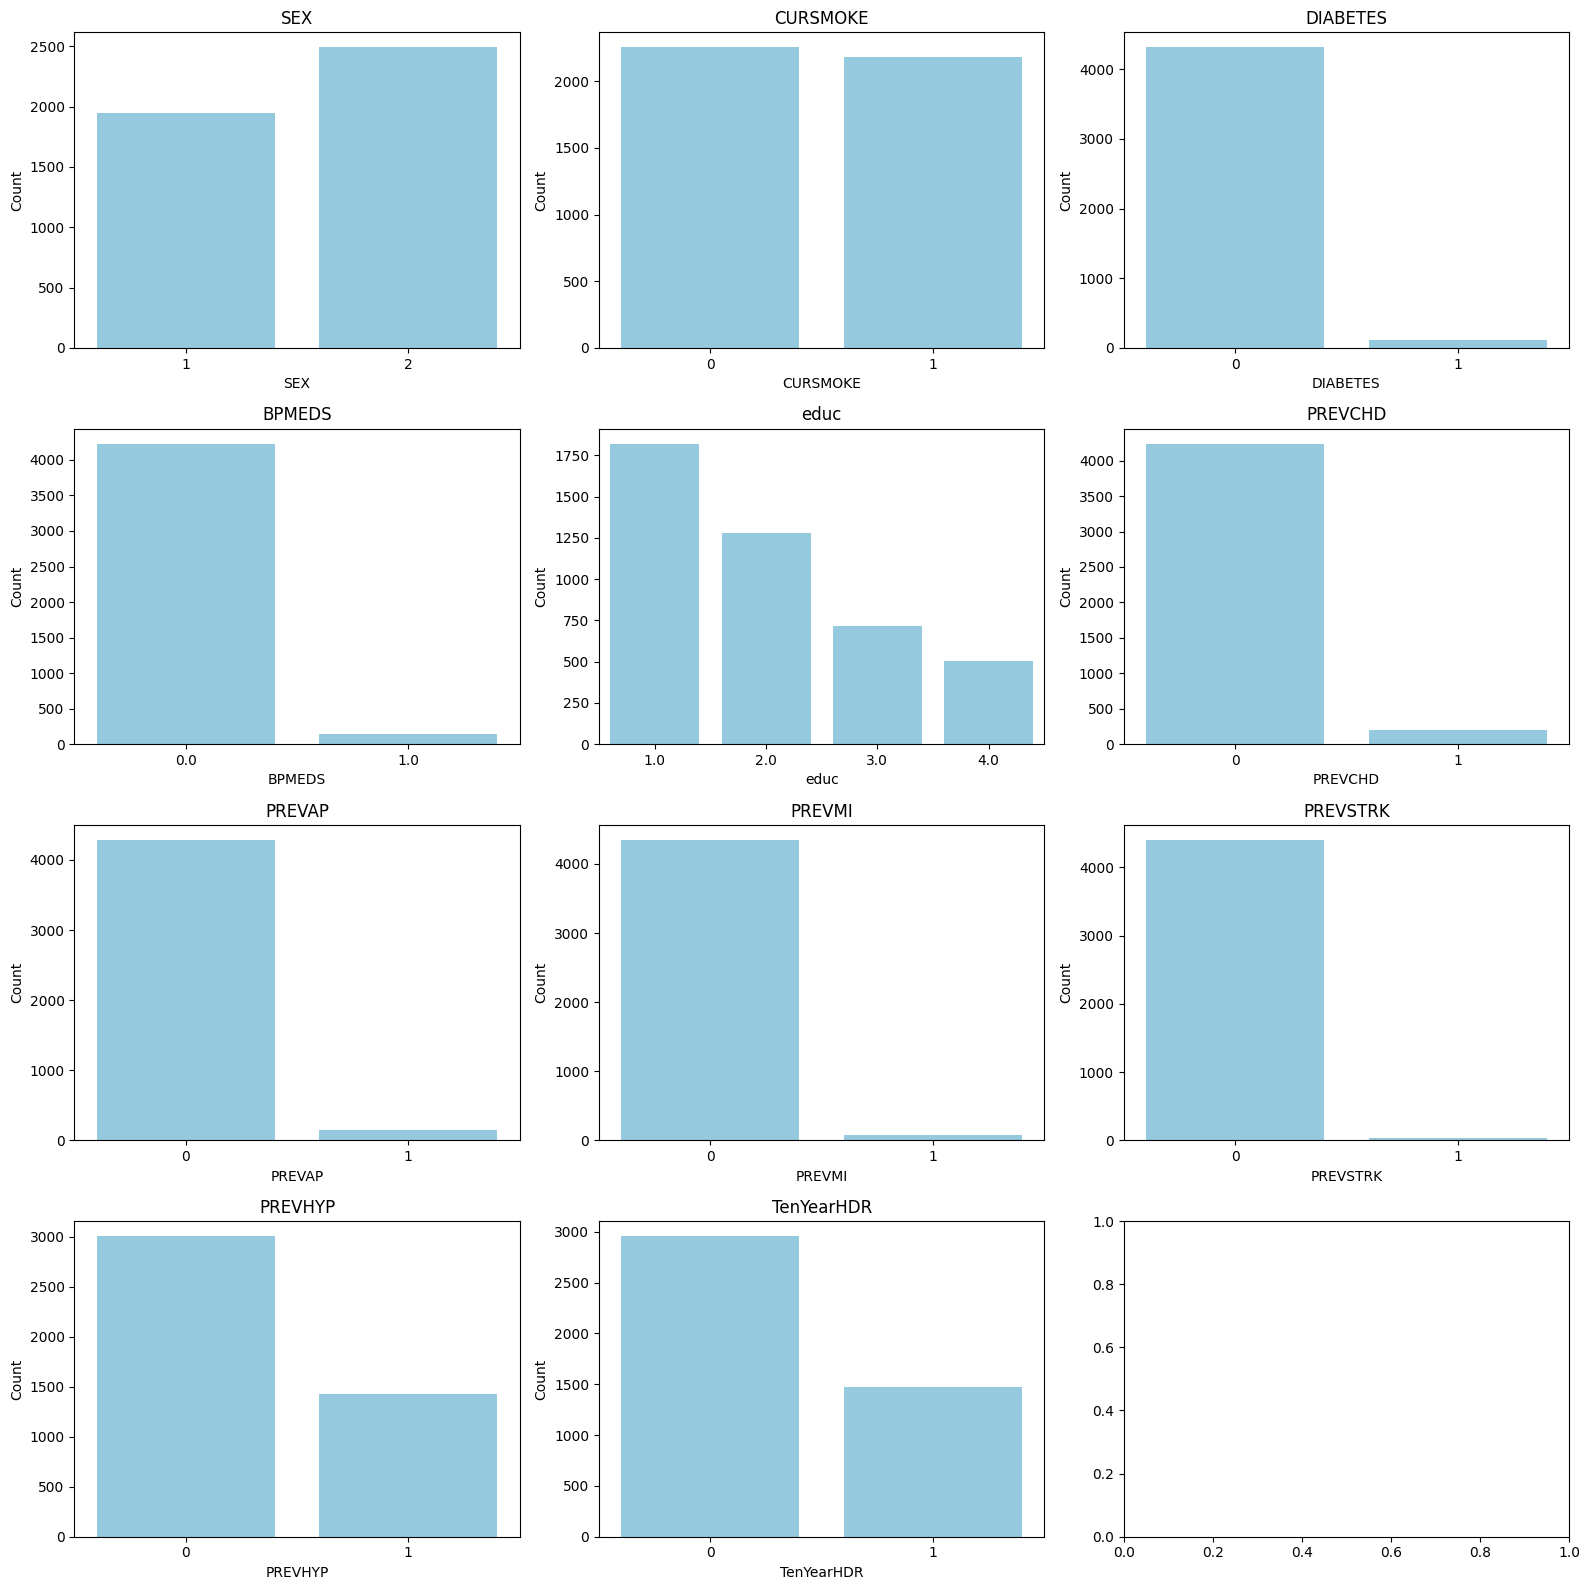

In [37]:
fig, ax = plt.subplots(4, 3, figsize=(16, 16))

i = 0
j = 0
for var in var_cat:
    sns.countplot(x = var, data = cleaned_df1, color = 'skyblue', ax=ax[i,j])

    ax[i,j].set_title(var)
    ax[i,j].set_xlabel(var)
    ax[i,j].set_ylabel('Count')

    if j==2:
        j=0
        i+=1
    else:
        j+=1

plt.tight_layout()
plt.show()

Observations:
* We can see imbalanced issues in the target variable. It suggests us using oversampling to balance the dataset before building the model.

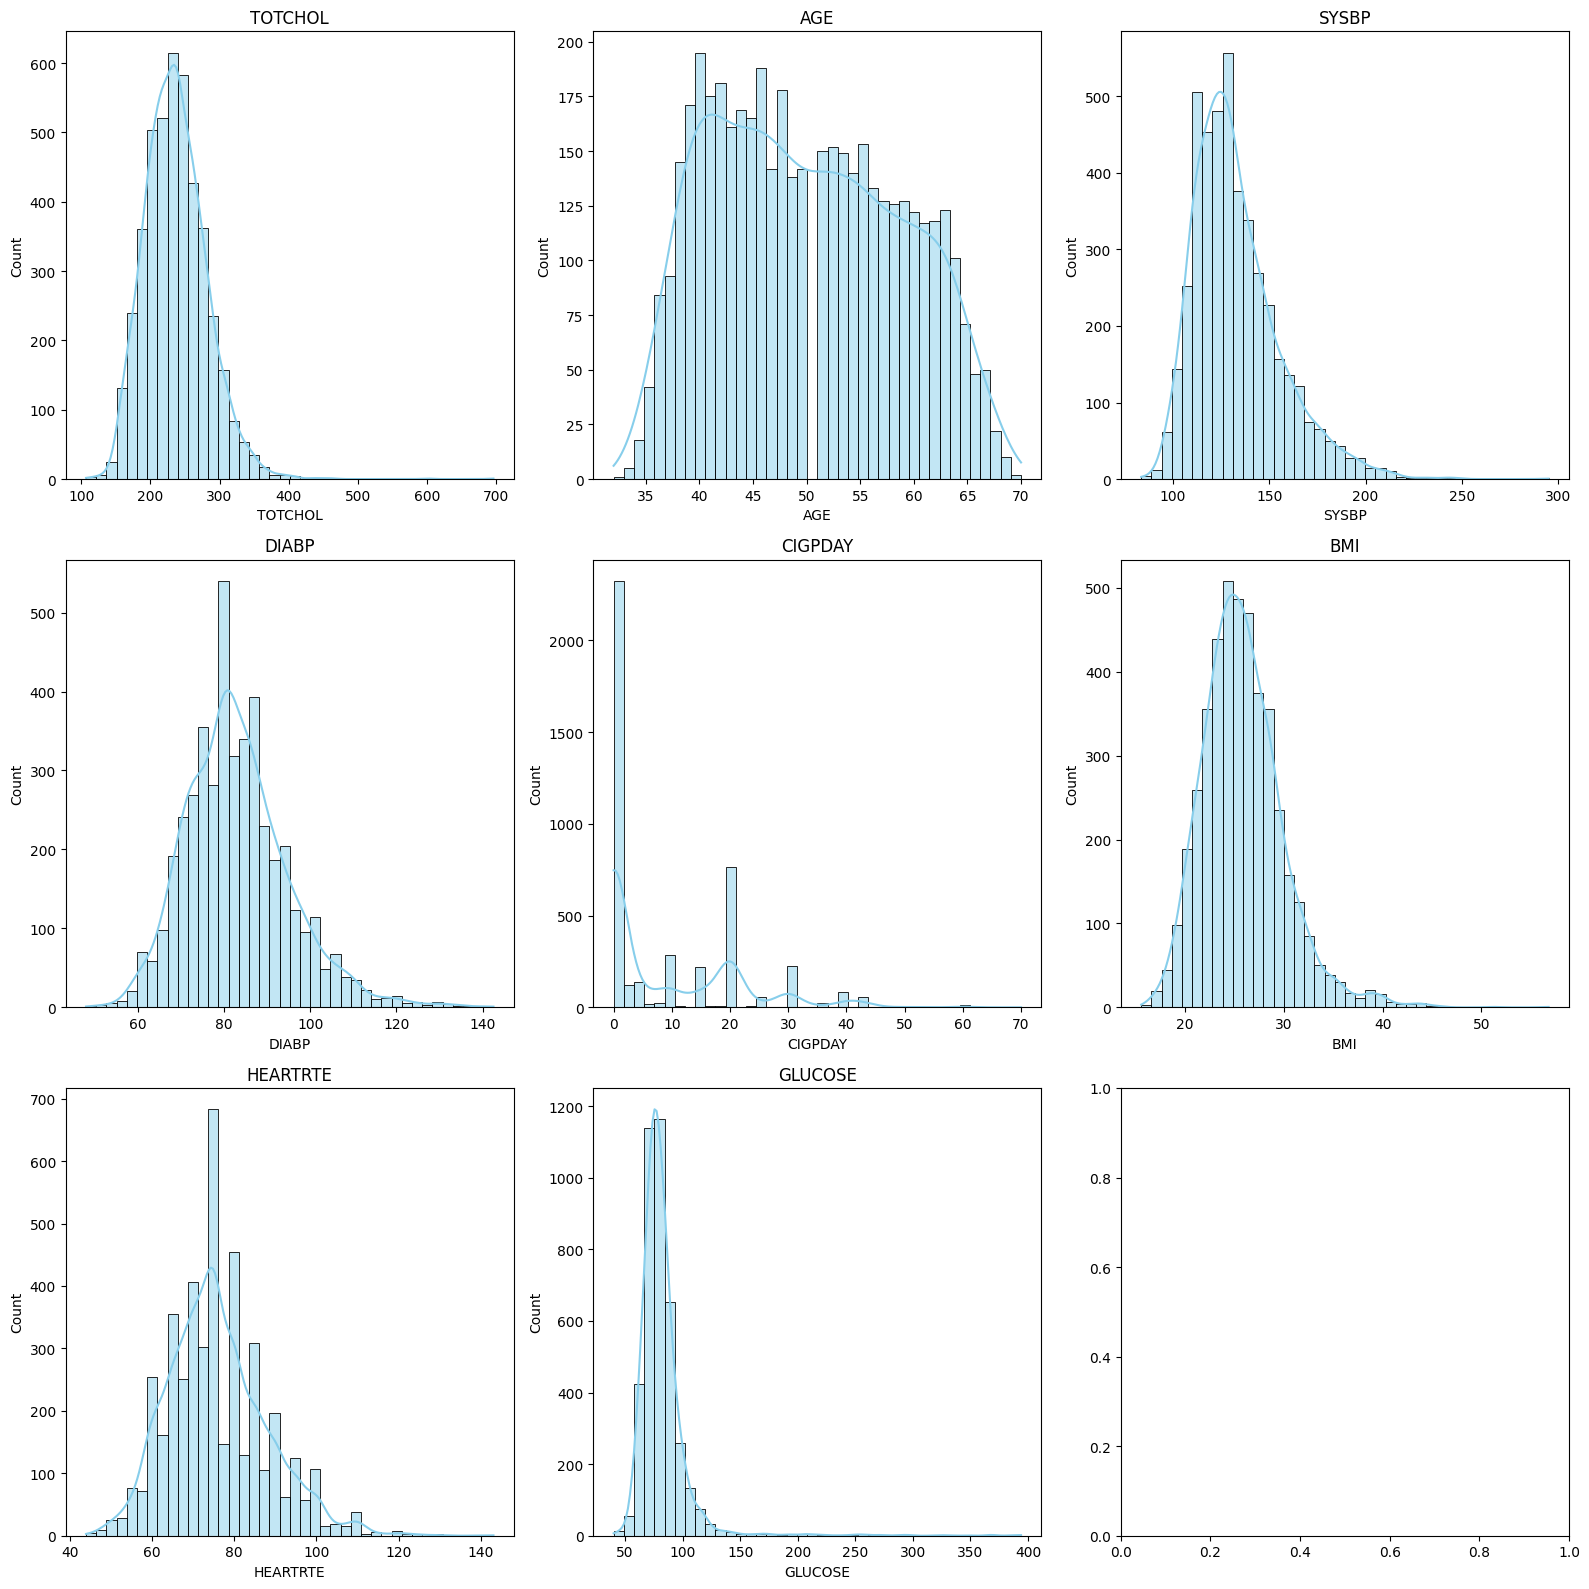

In [38]:
fig, ax = plt.subplots(3, 3, figsize=(16, 16))

i = 0
j = 0
for var in var_num:
    sns.histplot(cleaned_df1[var], bins = 40, kde = True, color = 'skyblue', edgecolor = 'black', ax=ax[i,j])

    ax[i,j].set_title(var)
    ax[i,j].set_xlabel(var)
    ax[i,j].set_ylabel('Count')

    if j==2:
        j=0
        i+=1
    else:
        j+=1

plt.tight_layout()
plt.show()



Observations :

* We can see Glucose, Total Cholesterol, Systolic BP, BMI, and Glucose are Right Skewed.

* While Diastolic BP & Heart Rate are close to Normal / Gaussian Distribution.

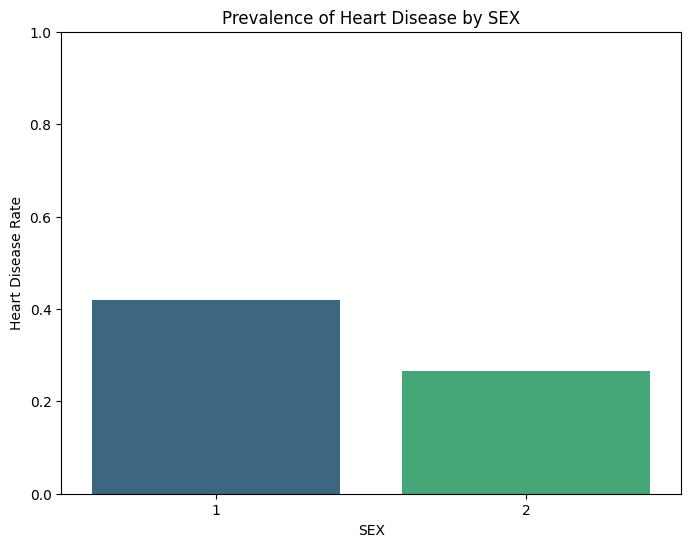

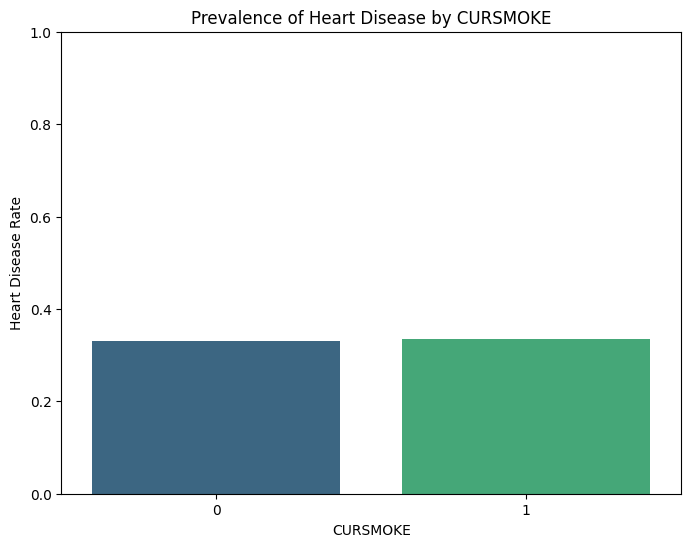

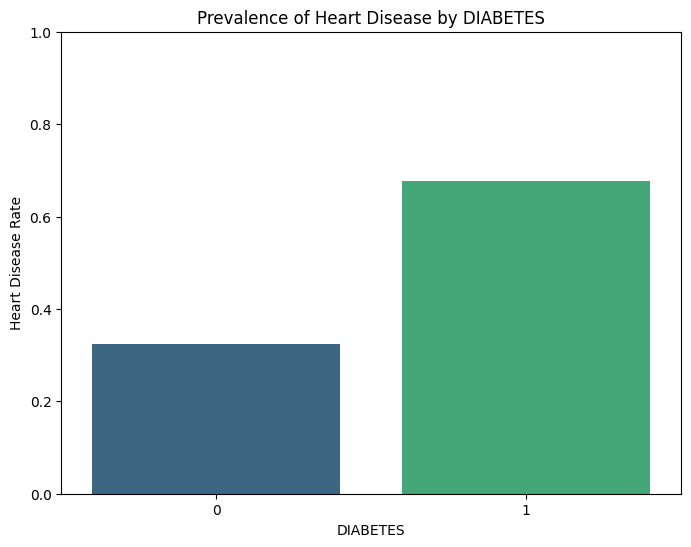

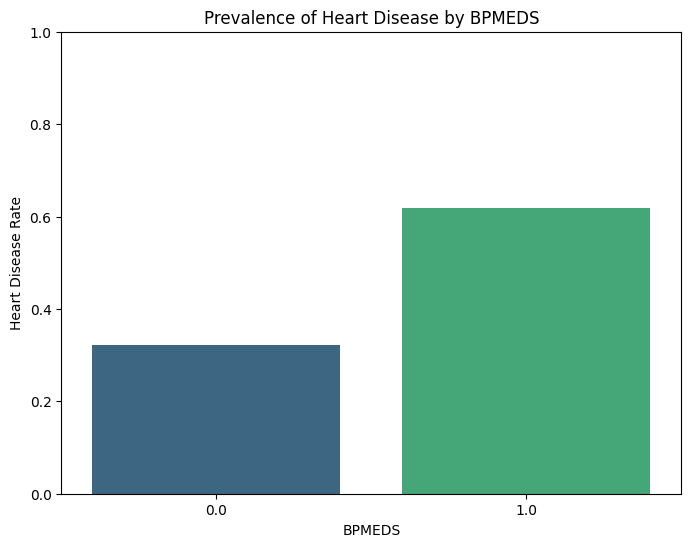

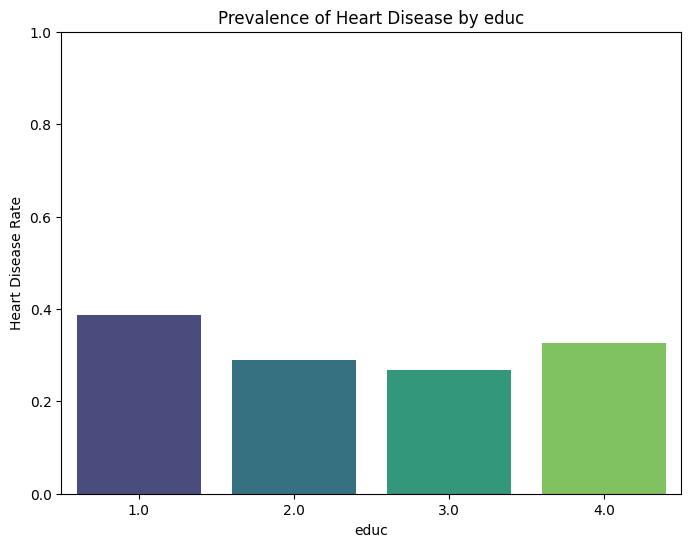

In [39]:
# Visualize the distribution of heart disease risk among categories
for var in ['SEX','CURSMOKE','DIABETES','BPMEDS','educ']:
    
    # Group by the categorical variable and calculate the heart disease rate
    cat_cvd_proportion = cleaned_df1.groupby(var)['TenYearHDR'].mean().reset_index()

    # Plotting
    plt.figure(figsize=(8, 6))
    sns.barplot(x=var, y='TenYearHDR', data=cat_cvd_proportion, palette='viridis')
    plt.title(f'Prevalence of Heart Disease by {var}')
    plt.xlabel(var)
    plt.ylabel('Heart Disease Rate')
    plt.ylim(0, 1)  # Limit y-axis to 0-1 for proportions
    plt.show()

Observation:
* Male patients have higher risk of heart disease than female patients.
* Smoking status does not reflect an obvious difference on the risk of heart disease.
* Diabetic patients have higher risk of heart disease than non-diabetic patients.
* Patients who use anti-hypertensive medication have higher risk of heart disease than patients who do not use.
* Patients with lower education level have higher risk of heart disease.

## Feature Engineering

In [40]:
cleaned_df1.isnull().sum()

RANDID          0
SEX             0
TOTCHOL        52
AGE             0
SYSBP           0
DIABP           0
CURSMOKE        0
CIGPDAY        32
BMI            19
DIABETES        0
BPMEDS         61
HEARTRTE        1
GLUCOSE       397
educ          113
PREVCHD         0
PREVAP          0
PREVMI          0
PREVSTRK        0
PREVHYP         0
TenYearHDR      0
dtype: int64

In [41]:
# Impute missing values with the median value
def impute_median(data):
    return data.fillna(data.median())

cleaned_df1.TOTCHOL = df['TOTCHOL'].transform(impute_median)
cleaned_df1.CIGPDAY = df['CIGPDAY'].transform(impute_median)
cleaned_df1.BMI = df['BMI'].transform(impute_median)
cleaned_df1.BPMEDS = df['BPMEDS'].transform(impute_median)
cleaned_df1.HEARTRTE = df['HEARTRTE'].transform(impute_median)
cleaned_df1.GLUCOSE = df['GLUCOSE'].transform(impute_median)
cleaned_df1.educ = df['educ'].transform(impute_median)


In [42]:
cleaned_df1.isnull().sum()

RANDID        0
SEX           0
TOTCHOL       0
AGE           0
SYSBP         0
DIABP         0
CURSMOKE      0
CIGPDAY       0
BMI           0
DIABETES      0
BPMEDS        0
HEARTRTE      0
GLUCOSE       0
educ          0
PREVCHD       0
PREVAP        0
PREVMI        0
PREVSTRK      0
PREVHYP       0
TenYearHDR    0
dtype: int64

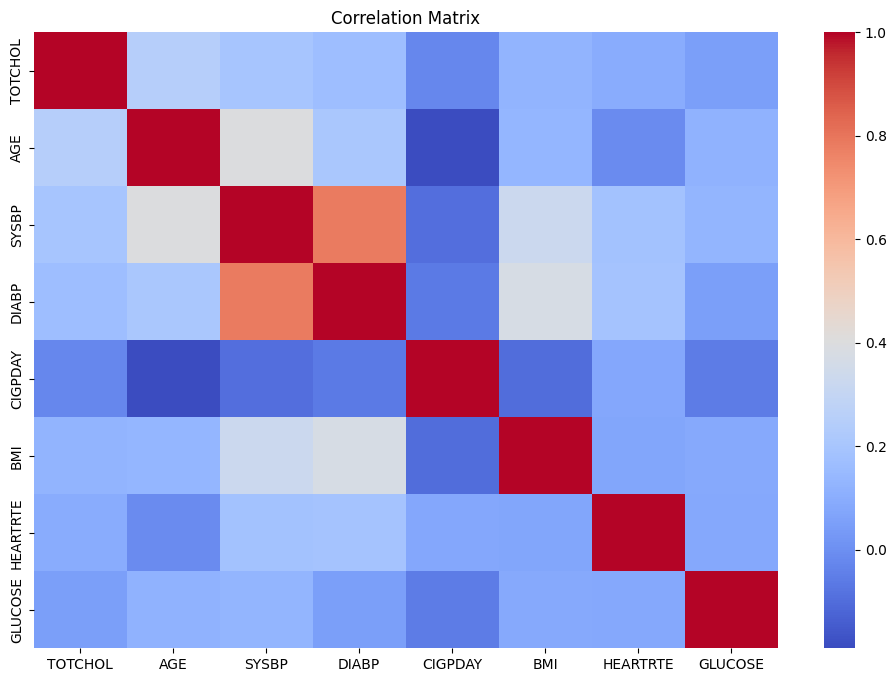

In [43]:
# Correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = cleaned_df1[var_num].corr()
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Observations:
* Systematic blood pressure and diastolic blood pressure have collinearity issue. But since these two always come together to evaluate the blood pressure, we keep those features in the dataset for further analysis.

In [432]:
cleaned_df1.describe().T

,count,mean,std,min,25%,50%,75%,max
RANDID,4434.0,4.987278e+06,2.903549e+06,2448.00,2440335.75,4972848.00,7463577.00,9999312.0
SEX,4434.0,1.561570e+00,4.962507e-01,1.00,1.00,2.00,2.00,2.0
TOTCHOL,4434.0,2.369962e+02,4.438858e+01,107.00,206.00,235.00,263.00,696.0
AGE,4434.0,4.992580e+01,8.676929e+00,32.00,42.00,49.00,57.00,70.0
SYSBP,4434.0,1.329078e+02,2.242160e+01,83.50,117.50,129.00,144.00,295.0
DIABP,4434.0,8.308356e+01,1.205600e+01,48.00,75.00,82.00,90.00,142.5
CURSMOKE,4434.0,4.918809e-01,4.999905e-01,0.00,0.00,0.00,1.00,1.0
CIGPDAY,4434.0,8.901669e+00,1.191277e+01,0.00,0.00,0.00,20.00,70.0
BMI,4434.0,2.584459e+01,4.093091e+00,15.54,23.09,25.46,28.06,56.8
DIABETES,4434.0,2.728913e-02,1.629430e-01,0.00,0.00,0.00,0.00,1.0


In [51]:
# Transform Sex from numerical values to categories
# Categorize Age, Cholesterol, Blood Pressure, and BMI

class Transformer(object):

    def fit(self, df, y=None):
        pass

    def transform(self, df, y=None):
        df['Sex_c'] = df['SEX'].map(self.categorize_sex)
        df['Age_c'] = df['AGE'].map(self.categorize_age)
        df['cholesterol_level'] = df['TOTCHOL'].apply(self.categorize_cholesterol)
        df['BP_c'] = df.apply(lambda x: self.categorize_blood_pressure(x['SYSBP'], x['DIABP']), axis=1)
        df['BMI_c'] = df['BMI'].apply(self.categorize_bmi)
        
        df = pd.get_dummies(df, columns=['Sex_c', 'Age_c', 'cholesterol_level', 'BP_c', 'BMI_c'], drop_first=True)
        
        return df.reset_index(drop=True)

    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)
    
    # Feature transform
    def categorize_sex(self, sex):
        if sex == 1:
            return "male"
        else:
            return "female"
        
        
    def systolic_blood_pressure(self, x):
        if type(x) == str: 
            x = x.split('/')[0]
            return float(x)
        else:
            print("row not str")
            return None

    def diastolic_blood_pressure(self, x):
        if type(x) == str: 
            x = x.split('/')[1]
            return int(x)
        else:
            print("row not str")
            return None
    
    # Define function to categorize age
    def categorize_age(self, age):
        if age >= 18 and age <= 44:
            return "18-44"
        elif age >= 45 and age <= 54:
            return "45-54"
        elif age >= 55 and age <= 64:
            return "55-64"
        elif age >= 65 and age <= 74:
            return "65-74"
        elif age >= 75:
            return "75+"
        else:
            return "Age out of range"
        
    # Define function to categorize cholesterol levels
    def categorize_cholesterol(self, cholesterol):
        if cholesterol < 200:
            return "health"
        elif cholesterol >= 200 and cholesterol <= 240:
            return "at risk"
        elif cholesterol > 240:
            return "dangerous"
        else:
            return "Undefined"
    
    # Define function to categorize blood pressure
    def categorize_blood_pressure(self, sbp, dbp):
        if sbp < 120 and dbp < 80:
            return "normal"
        elif sbp >= 120 and sbp <= 129 and dbp < 80:
            return "elevated"
        elif (sbp >= 130 and sbp <= 139) or (dbp >= 80 and dbp <= 89):
            return "Hypertension_1"
        elif sbp >= 140 or dbp >= 90:
            return "Hypertension_2"
        elif sbp >= 180 or dbp >= 120:
            return "Hypertensive crisis"
        else:
            return "Undefined"
    
    # Define function to categorize BMI
    def categorize_bmi(self, bmi):
        if bmi < 18.5:
            return "underweight"
        elif bmi >= 18.5 and bmi <= 24.9:
            return "Healthy Weight"
        elif bmi >= 25.0 and bmi <= 29.9:
            return "overweight"
        elif bmi >= 30.0:
            return "obese"
        else:
            return "Undefined"


In [45]:
transformer = Transformer()
df_transformed = transformer.fit_transform(cleaned_df1)
df_transformed.head(n=10)

,RANDID,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,...,cholesterol_level_dangerous,cholesterol_level_health,BP_c_Hypertension_2,BP_c_Undefined,BP_c_elevated,BP_c_normal,BMI_c_Undefined,BMI_c_obese,BMI_c_overweight,BMI_c_underweight
0,2448,1,195.0,39,106.0,70.0,0,0.0,26.97,0,...,False,True,False,False,False,True,False,False,True,False
1,6238,2,250.0,46,121.0,81.0,0,0.0,28.73,0,...,True,False,False,False,False,False,False,False,True,False
2,9428,1,245.0,48,127.5,80.0,1,20.0,25.34,0,...,True,False,False,False,False,False,False,False,True,False
3,10552,2,225.0,61,150.0,95.0,1,30.0,28.58,0,...,False,False,True,False,False,False,False,False,True,False
4,11252,2,285.0,46,130.0,84.0,1,23.0,23.10,0,...,True,False,False,False,False,False,False,False,False,False
5,11263,2,228.0,43,180.0,110.0,0,0.0,30.30,0,...,False,False,True,False,False,False,False,True,False,False
6,12629,2,205.0,63,138.0,71.0,0,0.0,33.11,0,...,False,False,False,False,False,False,False,True,False,False
7,12806,2,313.0,45,100.0,71.0,1,20.0,21.68,0,...,True,False,False,False,False,True,False,False,False,False
8,14367,1,260.0,52,141.5,89.0,0,0.0,26.36,0,...,True,False,False,False,False,False,False,False,True,False
9,16365,1,225.0,43,162.0,107.0,1,30.0,23.61,0,...,False,False,True,False,False,False,False,False,False,False


In [52]:
df_transformed.columns

Index(['RANDID', 'SEX', 'TOTCHOL', 'AGE', 'SYSBP', 'DIABP', 'CURSMOKE',
       'CIGPDAY', 'BMI', 'DIABETES', 'BPMEDS', 'HEARTRTE', 'GLUCOSE', 'educ',
       'PREVCHD', 'PREVAP', 'PREVMI', 'PREVSTRK', 'PREVHYP', 'TenYearHDR',
       'Sex_c_male', 'Age_c_45-54', 'Age_c_55-64', 'Age_c_65-74',
       'cholesterol_level_dangerous', 'cholesterol_level_health',
       'BP_c_Hypertension_2', 'BP_c_Undefined', 'BP_c_elevated', 'BP_c_normal',
       'BMI_c_Undefined', 'BMI_c_obese', 'BMI_c_overweight',
       'BMI_c_underweight'],
      dtype='object')

In [53]:
cleaned_df1_new_features = df_transformed.drop(['SEX', 'AGE', 'TOTCHOL', 'SYSBP', 'DIABP', 'BMI'], axis=1)
cleaned_df1_new_features.columns

Index(['RANDID', 'CURSMOKE', 'CIGPDAY', 'DIABETES', 'BPMEDS', 'HEARTRTE',
       'GLUCOSE', 'educ', 'PREVCHD', 'PREVAP', 'PREVMI', 'PREVSTRK', 'PREVHYP',
       'TenYearHDR', 'Sex_c_male', 'Age_c_45-54', 'Age_c_55-64', 'Age_c_65-74',
       'cholesterol_level_dangerous', 'cholesterol_level_health',
       'BP_c_Hypertension_2', 'BP_c_Undefined', 'BP_c_elevated', 'BP_c_normal',
       'BMI_c_Undefined', 'BMI_c_obese', 'BMI_c_overweight',
       'BMI_c_underweight'],
      dtype='object')

In [56]:
# Verity no missing values in the cleaned dataset
cleaned_df1_new_features.isnull().sum()

RANDID                         0
CURSMOKE                       0
CIGPDAY                        0
DIABETES                       0
BPMEDS                         0
HEARTRTE                       0
GLUCOSE                        0
educ                           0
PREVCHD                        0
PREVAP                         0
PREVMI                         0
PREVSTRK                       0
PREVHYP                        0
TenYearHDR                     0
Sex_c_male                     0
Age_c_45-54                    0
Age_c_55-64                    0
Age_c_65-74                    0
cholesterol_level_dangerous    0
cholesterol_level_health       0
BP_c_Hypertension_2            0
BP_c_Undefined                 0
BP_c_elevated                  0
BP_c_normal                    0
BMI_c_Undefined                0
BMI_c_obese                    0
BMI_c_overweight               0
BMI_c_underweight              0
dtype: int64

In [58]:
# Exporting data as a csv file
cleaned_df1_new_features.to_csv('./Framingham Period 1 Dataset.csv')

## Modeling

In [59]:
# Split data into features and target
X = cleaned_df1_new_features.drop(['TenYearHDR', 'RANDID'], axis=1)
y = cleaned_df1_new_features['TenYearHDR']

In [49]:
X.head(n=10)

,CURSMOKE,CIGPDAY,DIABETES,BPMEDS,HEARTRTE,GLUCOSE,educ,PREVCHD,PREVAP,PREVMI,...,cholesterol_level_dangerous,cholesterol_level_health,BP_c_Hypertension_2,BP_c_Undefined,BP_c_elevated,BP_c_normal,BMI_c_Undefined,BMI_c_obese,BMI_c_overweight,BMI_c_underweight
0,0,0.0,0,0.0,80.0,77.0,4.0,0,0,0,...,False,True,False,False,False,True,False,False,True,False
1,0,0.0,0,0.0,95.0,76.0,2.0,0,0,0,...,True,False,False,False,False,False,False,False,True,False
2,1,20.0,0,0.0,75.0,70.0,1.0,0,0,0,...,True,False,False,False,False,False,False,False,True,False
3,1,30.0,0,0.0,65.0,103.0,3.0,0,0,0,...,False,False,True,False,False,False,False,False,True,False
4,1,23.0,0,0.0,85.0,85.0,3.0,0,0,0,...,True,False,False,False,False,False,False,False,False,False
5,0,0.0,0,0.0,77.0,99.0,2.0,0,0,0,...,False,False,True,False,False,False,False,True,False,False
6,0,0.0,0,0.0,60.0,85.0,1.0,0,0,0,...,False,False,False,False,False,False,False,True,False,False
7,1,20.0,0,0.0,79.0,78.0,2.0,0,0,0,...,True,False,False,False,False,True,False,False,False,False
8,0,0.0,0,0.0,76.0,79.0,1.0,0,0,0,...,True,False,False,False,False,False,False,False,True,False
9,1,30.0,0,0.0,93.0,88.0,1.0,0,0,0,...,False,False,True,False,False,False,False,False,False,False


In [60]:
# Split data into training and testing sets
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=1234)

SMOTE generates synthetic samples for the minority class(es) by:

* Identifying the minority class samples.
* Selecting a random sample from the minority class.
* Identifying the k-nearest neighbors for this sample.
* Selecting one of these neighbors and generating a synthetic sample by interpolating between the two samples.

In [61]:
# Display new category counts
y_resampled.value_counts()

TenYearHDR
1    2958
0    2958
Name: count, dtype: int64

In [64]:
# Hyperparameter tuning and modelling
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score

# Define hyperparameters for tuning
param_grids = {
    'Decision Tree': {'max_depth': [10, 20, 30], 'min_samples_split': [2, 10, 20]},
    'Random Forest': {'n_estimators': [100, 400, 600], 'max_depth': [10, 20, 30]},
    'K-Nearest Neighbors': {'n_neighbors': [2, 3, 5], 'weights': ['uniform', 'distance']},
    'AdaBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1]},
    'Gradient Boosting': {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]},
    'XGBoost': {'n_estimators': [100, 200, 350], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]},
    'CatBoost': {'iterations': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2], 'depth': [3, 5, 7]}
}

# Instantiate classification models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(),
    'CatBoost': CatBoostClassifier(verbose=0)
}

# Fit models and generate classification reports
train_performance = []
test_performance = []

for name, model in models.items():
    print(f'Tuning {name} model...')
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    print(f'Best parameters for {name}: {grid_search.best_params_}')
    
    # Fit the best model on the training set
    best_model.fit(X_train, y_train)

    # Calculate predictions and scores on the training set
    y_train_pred = best_model.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    train_prec = precision_score(y_train, y_train_pred, average='weighted')
    train_rec = recall_score(y_train, y_train_pred, average='weighted')
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    y_train_proba = best_model.predict_proba(X_train)[:, 1] if hasattr(best_model, "predict_proba") else best_model.decision_function(X_train)
    train_auc = roc_auc_score(y_train, y_train_proba)

    train_performance.append((name, train_acc, train_prec, train_rec, train_f1, train_auc))

    train_report = classification_report(y_train, y_train_pred)
    print(f'{name} Training Classification Report:\n{train_report}\n')

    # Calculate predictions and scores on the test set
    y_test_pred = best_model.predict(X_test)
    acc = accuracy_score(y_test, y_test_pred)
    prec = precision_score(y_test, y_test_pred, average='weighted')
    rec = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')
    y_test_proba = best_model.predict_proba(X_test)[:, 1] if hasattr(best_model, "predict_proba") else best_model.decision_function(X_test)
    auc = roc_auc_score(y_test, y_test_proba)

    test_performance.append((name, acc, prec, rec, f1, auc))
    
    test_report = classification_report(y_test, y_test_pred)
    print(f'{name} Test Classification Report:\n{test_report}\n')


Tuning Decision Tree model...
Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_split': 2}
Decision Tree Training Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.90      0.83      2350
           1       0.88      0.75      0.81      2382

    accuracy                           0.82      4732
   macro avg       0.83      0.82      0.82      4732
weighted avg       0.83      0.82      0.82      4732


Decision Tree Test Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.78      0.73       608
           1       0.72      0.61      0.66       576

    accuracy                           0.70      1184
   macro avg       0.70      0.70      0.69      1184
weighted avg       0.70      0.70      0.70      1184


Tuning Random Forest model...
Best parameters for Random Forest: {'max_depth': 20, 'n_estimators': 100}
Random Forest Training Classification Report:

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R

Best parameters for AdaBoost: {'learning_rate': 1, 'n_estimators': 200}
AdaBoost Training Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.82      0.79      2350
           1       0.81      0.74      0.77      2382

    accuracy                           0.78      4732
   macro avg       0.78      0.78      0.78      4732
weighted avg       0.78      0.78      0.78      4732


AdaBoost Test Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       608
           1       0.78      0.73      0.76       576

    accuracy                           0.77      1184
   macro avg       0.77      0.77      0.77      1184
weighted avg       0.77      0.77      0.77      1184


Tuning Gradient Boosting model...
Best parameters for Gradient Boosting: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}
Gradient Boosting Training Classification Report:
           

In [65]:
# Display performance results
print("Train Performance:")
for perf in train_performance:
    print(f"{perf[0]}: Accuracy={perf[1]:.4f}, Precision={perf[2]:.4f}, Recall={perf[3]:.4f}, F1-Score={perf[4]:.4f}, AUC_ROC={perf[5]:.4f}")

print("\nTest Performance:")
for perf in test_performance:
    print(f"{perf[0]}: Accuracy={perf[1]:.4f}, Precision={perf[2]:.4f}, Recall={perf[3]:.4f}, F1-Score={perf[4]:.4f}, AUC_ROC={perf[5]:.4f}")


Train Performance:
Decision Tree: Accuracy=0.8221, Precision=0.8296, Recall=0.8221, F1-Score=0.8212, AUC_ROC=0.9036
Random Forest: Accuracy=0.9985, Precision=0.9985, Recall=0.9985, F1-Score=0.9985, AUC_ROC=1.0000
K-Nearest Neighbors: Accuracy=1.0000, Precision=1.0000, Recall=1.0000, F1-Score=1.0000, AUC_ROC=1.0000
AdaBoost: Accuracy=0.7809, Precision=0.7830, Recall=0.7809, F1-Score=0.7805, AUC_ROC=0.8683
Gradient Boosting: Accuracy=0.8109, Precision=0.8148, Recall=0.8109, F1-Score=0.8104, AUC_ROC=0.8986
XGBoost: Accuracy=0.8261, Precision=0.8313, Recall=0.8261, F1-Score=0.8255, AUC_ROC=0.9130
CatBoost: Accuracy=0.8669, Precision=0.8715, Recall=0.8669, F1-Score=0.8665, AUC_ROC=0.9412

Test Performance:
Decision Tree: Accuracy=0.6976, Precision=0.7007, Recall=0.6976, F1-Score=0.6954, AUC_ROC=0.7506
Random Forest: Accuracy=0.7610, Precision=0.7609, Recall=0.7610, F1-Score=0.7609, AUC_ROC=0.8411
K-Nearest Neighbors: Accuracy=0.7652, Precision=0.7710, Recall=0.7652, F1-Score=0.7646, AUC_ROC

Observation:
* AdaBoost have the highest accuracy, precision, recall, and F1-score.
* XGBoost appears to have the best discriminative ability.


### Feature Importance

#### AdaBoost

In [124]:
# Define the best parameters from the tuning process
best_params = {'learning_rate': 1, 'n_estimators': 200}

# Instantiate the XGBoost model with the best parameters
ada_model = AdaBoostClassifier(**best_params)

# Fit the model on the training set
ada_model.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=200)

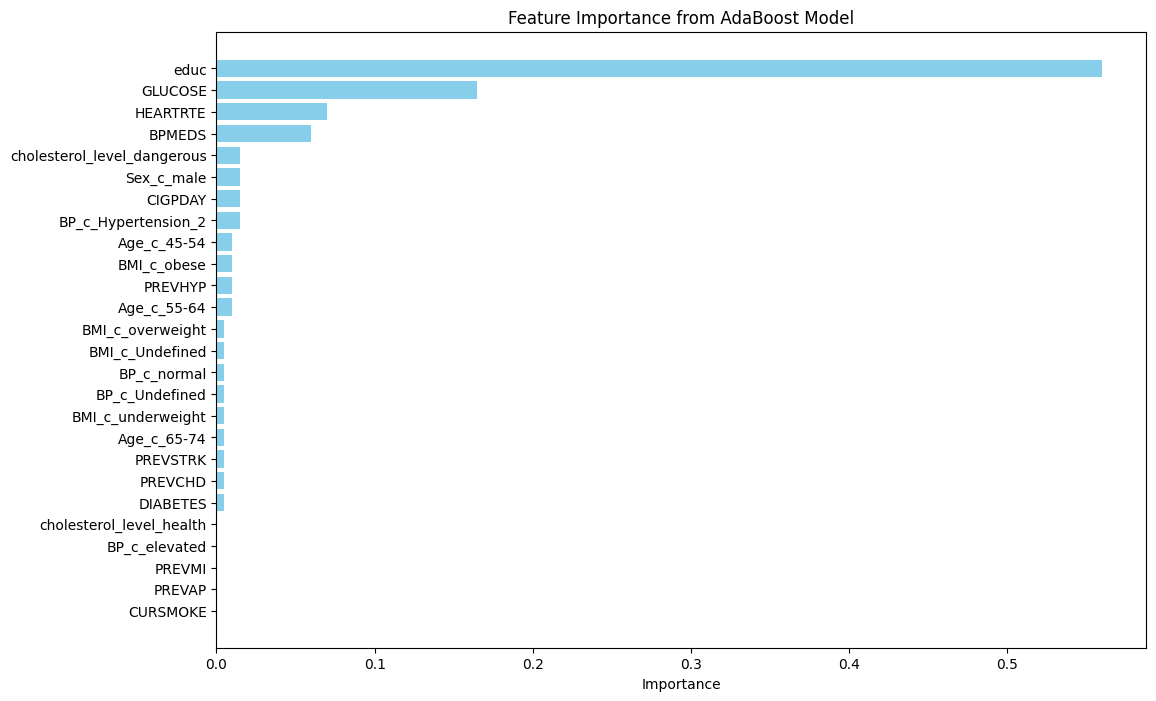

In [102]:
# Get feature importance
feature_importance = ada_model.feature_importances_

feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance from AdaBoost Model')
plt.gca().invert_yaxis()
plt.show()


Note: The updated SHAP package does not contain the AdaBoostClassifier. We proceed further with XGBoost to understand the contribution of features towards prediction of heart risk.

#### XGBoost

In [84]:
from xgboost import XGBClassifier, plot_importance

# Define the best parameters from the tuning process
best_params = {'n_estimators': 200, 'learning_rate': 0.2, 'max_depth': 3}

# Instantiate the XGBoost model with the best parameters
xgb_model = XGBClassifier(**best_params)

# Fit the model on the training set
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

<Figure size 1000x600 with 0 Axes>

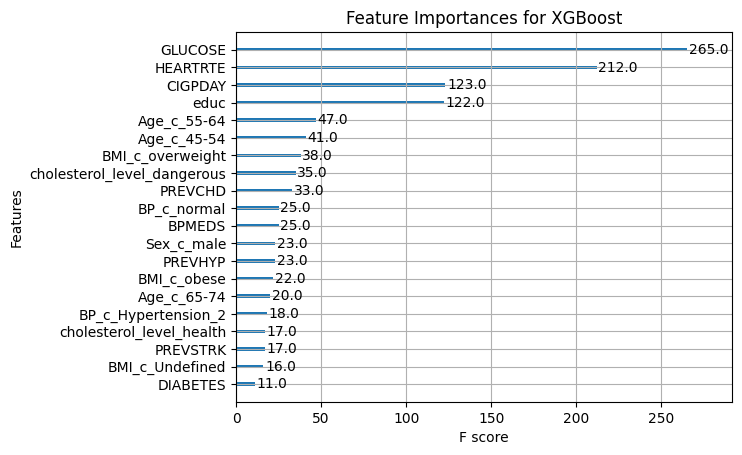

In [85]:
# Feature importance
plt.figure(figsize=(10, 6))
plot_importance(xgb_model, max_num_features=20, importance_type='weight')
plt.title('Feature Importances for XGBoost')
plt.show()

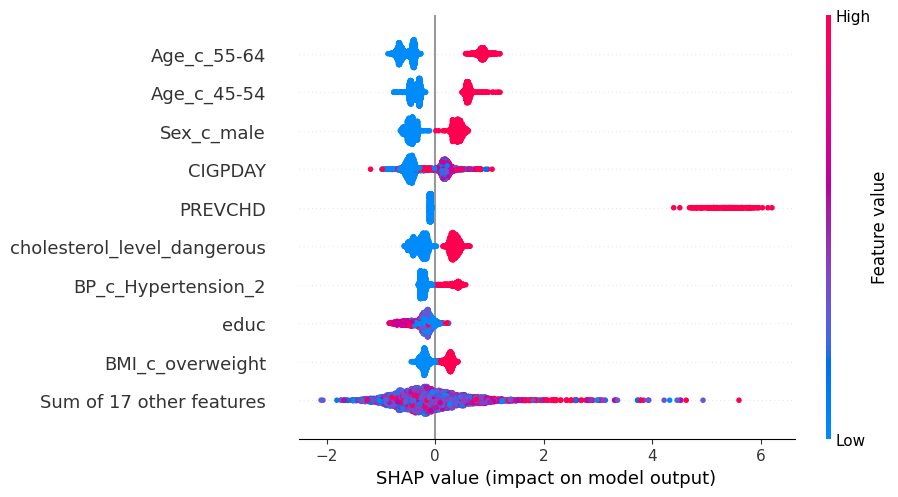

In [87]:
import shap

# Initialize the SHAP explainer
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer(X)

# Visualize feature importance with feature values
shap.plots.beeswarm(shap_values, show=True)


## Conclusion

* XGBoost's consistent performance across training and testing datasets suggests it generalizes well to unseen data. 
* Higher education levels have lower heart disease risk, probably because people with high education levels are often associated with healthier lifestyle choices.
* Patients aged 45 and above have higher risk of getting heart disease.
* Male patients have higher risk of getting heart disease than female patients.
* Patients with a prevalent Coronary Heart Disease are at a significantly higher risk of heart disease. 
* Elevated heart rate can indicate underlying cardiovascular problems or poor physical fitness, both of which are risk factors for heart disease.
